In [1]:
#Importing the required lib
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import display

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

In [12]:
file ='semi_cleaned.csv'
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.73, 'encoding': 'Windows-1252', 'language': ''}

# Exploring the data

In [16]:
df = pd.read_csv('semi_cleaned.csv')
df.drop('Unnamed: 0',axis = 1,inplace=True)
df.head(5)


,posted_date,brand,model,year,payment_options,engine_capacity,fuel_type,transmission_type,kilometers,color,...,Fog Lights,Power Steering,Power Windows,Premium Wheels/Rims,Sunroof,Bluetooth System,Keyless Start,Navigation System,Off-Road Tyres,Touch Screen
0,2021-10-04,Chrysler,Town and Country,2001.0,Cash,More than 3000,Benzine,Automatic,More than 200000,Burgundy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-10-18,Chrysler,PT Cruiser,2007.0,Cash,1800 - 2000,Benzine,Automatic,10000 - 19999,Black,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-10-17,Chrysler,Voyager/Caravan,1999.0,Cash,1800 - 2000,Benzine,Manual,160000 - 179999,Gray,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-10-17,Chrysler,Neon,1998.0,Cash,1800 - 2000,Benzine,Manual,100000 - 119999,Blue - Navy Blue,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-10-16,Chrysler,M300,2003.0,Cash,More than 3000,Benzine,Automatic,160000 - 179999,Silver,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df.columns

Index(['posted_date', 'brand', 'model', 'year', 'payment_options',
       'engine_capacity', 'fuel_type', 'transmission_type', 'kilometers',
       'color', 'body_type', 'views_count', 'owner_name', 'phone_number',
       'price', 'tit_desc', 'governorate', 'city', 'day', 'month',
       'payment_options_isnan', 'engine_capacity_isnan', 'fuel_type_isnan',
       'color_isnan', 'body_type_isnan', 'phone_number_isnan',
       'feature_specified', 'num_features', 'len_features', 'ABS',
       'Air Conditioning', 'Airbags', 'Alarm/Anti-Theft System', 'AM/FM Radio',
       'Aux Audio In', 'Cruise Control', 'EBD', 'Leather Seats',
       'Parking Sensors', 'Power Locks', 'Power Mirrors', 'Power Seats',
       'Rear View Camera', 'Roof Rack', 'USB Charger', 'Fog Lights',
       'Power Steering', 'Power Windows', 'Premium Wheels/Rims', 'Sunroof',
       'Bluetooth System', 'Keyless Start', 'Navigation System',
       'Off-Road Tyres', 'Touch Screen'],
      dtype='object')

In [8]:
df.shape

(63554, 55)

### Dealing with data from 1920 to 1990 and edit every wrong year or price

In [17]:
df.loc[[3203,7892,4748,45222,59898],'year'] = 1983 
df.loc[4267,['year','kilometers']] = 1984,'More than 200000'
df.loc[4768,'year'] = 1982
df.loc[4810,'year'] = 1986
df.loc[16417, 'year'] = 1972
df.loc[17186, 'year'] = 1985
df.loc[17619, 'year'] = 1988
df.loc[45496, ['year','brand','model']] = 1980,'lada','1500' 
df.loc[46818, 'year'] = 1977 
df.loc[47013, ['year','model']] = 1979,'504'
df.loc[57335, 'year'] = 1984
df.loc[49685, 'year'] = 1980
df.loc[[6638,46539], 'year'] = 1974
df.loc[[7050,20276], 'price'] = 25000
df.loc[[7250,7549], 'model'] = '132'
df.loc[8143, 'model'] = '127'
df.loc[20035, 'year'] = 2020
df.loc[[21084,57098], 'price'] = 40000
df.loc[[21711,57908], 'price'] = 30000
df.loc[32968, 'year'] = 1979
df.loc[45451, ['brand','model','year']] = 'fiat','Regata',1985
df.loc[[45167,45222,45534,45694],'brand'] = 'Daihatsu'
df.loc[46602, 'year'] = 1978
df.loc[[59809,49292,49916,49650,51293], 'price'] = 15000
df.loc[[4793,5932,61140], 'price'] = 23000
df.loc[63179, 'year'] =  2017
df.loc[57, 'year'] = 1981
df.loc[5676, 'price'] = 35000 
df.loc[10943, ['brand','price']] = 'mazda' , 25000 
df.loc[[12292,61565], 'price'] = 50000
df.loc[18437, 'price'] = 27000
df.loc[[18650,20284,20520,21035,21254,21526,21729,60073,62047], 'price'] = 60000 
df.loc[[21002,21257,26812,29692,30796], 'price'] = 80000
df.loc[[21737,24893,24919], 'price'] = 90000
df.loc[[22161,31117], 'price'] = 70000
df.loc[26113, 'price'] = 100000
df.loc[60821, ['model','price']] = 'Golf',60000


### From 1990 to 2005 


In [18]:
df.loc[[5610,6767,34497], 'price'] = 55000
df.loc[[10824,31951,44096,53706,61122,61734,62318,62613], 'price'] = 105000 
df.loc[11620, 'price'] = 150000
df.loc[[11833,22490,45963,46067,53328], 'price'] = 120000
df.loc[[14421,46082,46743,59125,60222], 'price'] = 85000
df.loc[19672, 'price'] = 170000
df.loc[[23283,23346,23493,23744,34459,46334,54099,56578], 'price'] = 75000
df.loc[34661, 'year'] = 1991
df.loc[[38546,52770], 'price'] = 130000
df.loc[[42070,44478,63059], 'price'] = 90000
df.loc[42223, 'year'] = 2008
df.loc[48452, 'price'] = 350000
df.loc[[53313,53515,56916], 'price'] = 40000
df.loc[57249, 'price'] = 30000
df.loc[57250, 'price'] = 50000



### from 2006 to 2021

In [19]:
df.loc[90, 'price'] = 275000 
df.loc[218, 'year'] = 2003 
df.loc[303, 'year'] = 2005
df.loc[485, 'year'] = 2001 
df.loc[[3196,3386], ['brand','model']] = 'zotye' , 'Explosion' 
df.loc[3293, 'price'] = 125000 
df.loc[[3357,3358,3581], 'price'] = 150000 
df.loc[8031, ['price','model']] = 80000 ,'Punto' 
df.loc[8140, ['brand','model']] = 'nissan' , 'Sunny' 
df.loc[[10507,10720,10860], 'price'] = 265000 
df.loc[10770, ['brand','model']] = 'speranza' , 'A516'
df.loc[10888, ['brand','model']] = 'suzuki' , 'Van'
df.loc[10848, 'brand'] = 'dfsk'       
df.loc[11139, ['brand','model']] = 'nissan' , 'Juke'
df.loc[[11944,12141], ['brand','model']] = 'opel' , 'Vectra'
df.loc[12157, ['brand','model']] = 'speranza' , 'A620'
df.loc[12433, ['brand','model']] = 'mercedes-benz' , 'C180'
df.loc[16490, 'year'] = 1995 
df.loc[19545, 'price'] = 255000 
df.loc[19614, 'price'] = 600000 
df.loc[31752, 'price'] = 129000 

In [45]:
#The installments is not requried 
df = df[df['payment_options'] != "Installments"]


In [288]:
#yearr = df.loc[df['Brand'] == 'kia'  , 'Year']
#df_fiat   = df.loc[(df['Brand'] == 'kia')]
#display(df_fiat[df_fiat == 210000].index.value)
#ree = lambda x: (x - x.mean()) / x.std()
#dd = df_fiat.groupby(['Model'],as_index=False).Price.transform('count')
#for i in range(len(df_fiat)):
#    if df_fiat['Price'][i] > (dd['Price'][i] +50000):
#        df_fiat['Price'][i] = dd['Price'][i]
#display(dd)
#plt.scatter(yearr,df_fiat)
#plt.show()

,Model,Year
0,Carens,290
1,Carnival,29
2,Ceed,32
3,Cerato,674
4,Cerato Coupe,66
5,Clarus,2
6,Mohave,1
7,Oprius,3
8,Optima,4
9,Other,48


In [48]:
df['price'].describe()

count    6.260200e+04
mean     1.475571e+05
std      1.846434e+05
min      5.000000e+03
25%      5.900000e+04
50%      1.000000e+05
75%      1.700000e+05
max      4.200000e+06
Name: price, dtype: float64

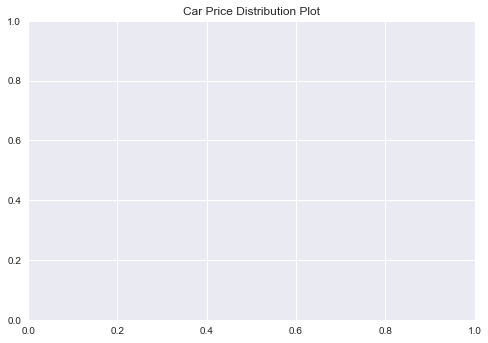

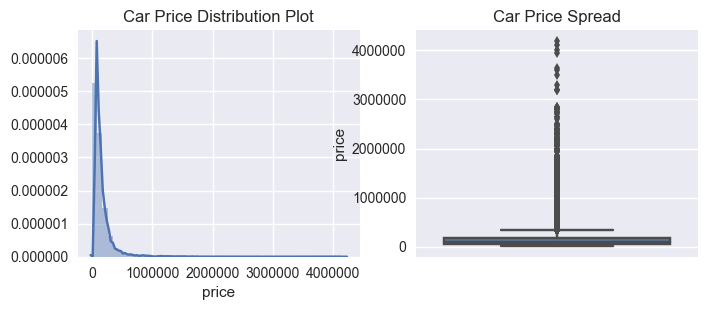

In [49]:
#The Price distribution
plt.figure(figsize = (8, 3), dpi = 100)
plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df['price']);

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df['price']);
plt.show()

In [20]:
#new row with the log price
log_price = np.log(df['price'])
df['log_price'] = log_price

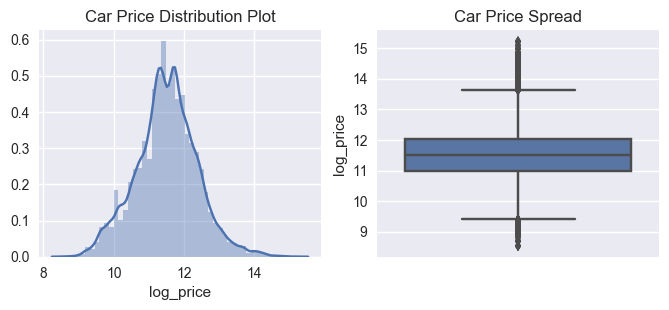

In [51]:
#new dist after the log
plt.figure(figsize = (8, 3), dpi = 100)
plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df['log_price']);

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df['log_price']);
plt.show()

In [40]:
#trying to removw the outliers
df = df[(df['log_price'] < 13) & (df['log_price'] > 10)]

In [52]:
df.columns

Index(['posted_date', 'brand', 'model', 'year', 'payment_options',
       'engine_capacity', 'fuel_type', 'transmission_type', 'kilometers',
       'color', 'body_type', 'views_count', 'owner_name', 'phone_number',
       'price', 'tit_desc', 'governorate', 'city', 'day', 'month',
       'payment_options_isnan', 'engine_capacity_isnan', 'fuel_type_isnan',
       'color_isnan', 'body_type_isnan', 'phone_number_isnan',
       'feature_specified', 'num_features', 'len_features', 'ABS',
       'Air Conditioning', 'Airbags', 'Alarm/Anti-Theft System', 'AM/FM Radio',
       'Aux Audio In', 'Cruise Control', 'EBD', 'Leather Seats',
       'Parking Sensors', 'Power Locks', 'Power Mirrors', 'Power Seats',
       'Rear View Camera', 'Roof Rack', 'USB Charger', 'Fog Lights',
       'Power Steering', 'Power Windows', 'Premium Wheels/Rims', 'Sunroof',
       'Bluetooth System', 'Keyless Start', 'Navigation System',
       'Off-Road Tyres', 'Touch Screen', 'log_price'],
      dtype='object')

In [21]:
data_cleaned = df.drop(['posted_date','phone_number',
       'price', 'tit_desc', 'governorate', 'city', 'day', 'month','engine_capacity_isnan', 'fuel_type_isnan',
       'color_isnan', 'body_type_isnan', 'phone_number_isnan','feature_specified','num_features', 'len_features','payment_options_isnan', 'color', 'views_count', 'owner_name'],axis = 1)
#getting The dummies
data_dummy = pd.get_dummies(data_cleaned,drop_first = True)
data_dummy.shape
#Cutting the data into target and input
target = data_dummy['log_price']
inputs = data_dummy.drop('log_price',axis = 1)

In [22]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
#scaling the data
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)
#spliting the data
X_train,X_test, y_train,  y_test = train_test_split(inputs_scaled,target,test_size = 0.25 , random_state =42)

In [23]:
def regression_model(model):
    """
    Will fit the regression model passed and will return the regressor object and the score
    """
    regressor = model
    regressor.fit(X_train,y_train)
    score = regressor.score(X_train,y_train)
    y_hat = regressor.predict(X_train)
    score_test = regressor.score(X_test,y_test)
    y_hat_test = regressor.predict(X_test)
    return regressor, score , score_test , y_hat , y_hat_test 

In [25]:
model_performance = pd.DataFrame(columns = ["Features", "Model", "Score",'y_hat',"Test_Score","y_hat_test"])
models_to_evaluate = [LinearRegression(),RandomForestRegressor(n_estimators = 100, random_state = 42)]

for model in models_to_evaluate:
    regressor, score , score_test,y_hat,y_hat_test = regression_model(model)
    model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": score,'y_hat':y_hat,"Test_Score":score_test,"y_hat_test":y_hat_test}, ignore_index=True)

model_performance

,Features,Model,Score,y_hat,Test_Score,y_hat_test
0,Linear,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.916918,"[12.0899221897, 9.67001080513, 10.6659705639, ...",-1.933717e+24,"[12.3335449696, 11.3417205811, 10.6434521675, ..."
1,Linear,"(DecisionTreeRegressor(criterion='mse', max_de...",0.987001,"[12.0125079858, 9.74263049283, 10.5700217702, ...",9.274189e-01,"[12.4043315347, 11.4249537502, 10.7135014704, ..."


In [66]:
X_test[2]

array([ -7.40066621e-01,  -6.17720537e-01,  -8.32880167e-01,
        -5.79106592e-01,   1.84755845e+00,  -8.59991305e-01,
        -7.38935115e-01,  -3.74469615e-01,  -3.90391217e-01,
        -6.40599670e-01,  -3.92529525e-01,  -7.63436458e-01,
        -5.82546654e-01,  -3.08501652e-01,  -3.23263670e-01,
        -2.49022620e-01,  -5.68204723e-01,  -6.44339123e-01,
        -6.07275709e-01,  -8.07437099e-01,  -3.90578538e-01,
        -3.10485650e-01,  -5.82958507e-01,  -3.10028537e-01,
        -2.87625699e-01,  -3.70278480e-01,  -3.48476154e-01,
        -9.67181640e-02,  -1.95342549e-01,  -1.15523434e-01,
        -4.02901957e-02,  -2.57156053e-02,  -3.96672389e-03,
        -3.39109183e-02,  -9.71683173e-03,  -5.38848971e-02,
        -9.71683173e-03,  -2.05826147e-01,  -9.33466344e-02,
        -1.81806734e-02,  -1.32713839e-01,  -1.12202074e-02,
        -2.94305177e-02,  -4.59662718e-02,  -1.14399348e-01,
        -2.38959227e-01,  -3.96672389e-03,  -3.07797629e-01,
        -1.15942303e-01,

In [42]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,model_performance['y_hat_test'][1])

0.14973746099511964

In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,model_performance['y_hat_test'][1])

0.05491586975732439

In [55]:
#function for getting diff
def get_diff(Y_hat_test,Y_test):    
    df_pr = pd.DataFrame(np.exp(Y_hat_test),columns=['predictions'])
    Y_test = Y_test.reset_index(drop=True)
    df_pr['target'] = np.exp(Y_test)
    df_pr['diff'] = abs(df_pr['target'] - df_pr['predictions'])
    df_pr['diff%'] = (df_pr['diff'] / df_pr['target'])*100
    return df_pr

In [56]:
get_diff(model_performance['y_hat_test'][1],y_test).head()    


,predictions,target,diff,diff%
0,243855.602173,220000.0,23855.602173,10.843456
1,91578.677958,76000.0,15578.677958,20.498260
2,44958.785460,38000.0,6958.785460,18.312593
3,61906.368829,71000.0,9093.631171,12.807931
4,119308.089815,145000.0,25691.910185,17.718559


In [57]:
get_diff(model_performance['y_hat_test'][1],y_test).describe().round(3)

,predictions,target,diff,diff%
count,15889.000,15889.000,15889.000,15889.000
mean,145707.138,148955.234,19617.226,15.946
std,176365.882,189396.920,53932.140,33.004
min,9625.221,7000.000,0.900,0.001
25%,59987.140,60000.000,3982.497,4.292
50%,100413.448,100000.000,9185.917,9.572
75%,171547.276,170000.000,19256.378,18.735
max,3756038.480,4700000.000,2591429.686,2146.586


In [ ]:
dd = df.groupby(['brand'],as_index=False).Price.transform('count')


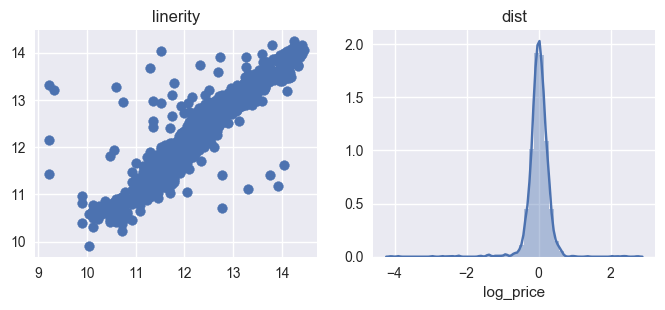

In [204]:
plt.figure(figsize = (8, 3), dpi = 100)
plt.subplot(1,2,1)
plt.title('linerity')
plt.scatter(y_train,model_performance['y_hat'][3])

plt.subplot(1,2,2)
plt.title('dist')
sns.distplot(y_train - model_performance['y_hat'][3])
plt.show()

In [158]:
#The weight of every feature
reg_summry = pd.DataFrame(inputs.columns.values,columns = ['Feature'])
reg_summry['Weights'] = reg.coef_
reg_summry.head()

,Feature,Weights
0,Year,0.698544
1,Engine Capacity (CC),0.028361
2,Kilometers,-0.057330
3,Model_118,0.002707
4,Model_120,-0.044078
